In [11]:
import pandas as pd
dt=pd.read_csv('donnees_vol_multiple.csv')


In [12]:
dt.describe()

,mission_id,time,target_x,target_y,target_z,real_x,real_y,real_z,vx,vy,...,wind_x,wind_y,wind_z,erreur_m,velocity,erreur_cumulee_m,battery_level,rain,fog,snow
count,6695.000000,6.695000e+03,6695.000000,6695.000000,6695.0,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,...,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000
mean,44.467214,1.743595e+09,4.274832,0.324122,-5.0,13.350408,11.072974,2.193566,0.503908,0.323414,...,3.000217,1.995050,0.498734,53.986819,7.604715,170.311753,75.997013,0.201176,0.152697,0.165994
std,41.055354,2.276861e+05,4.100513,2.615616,0.0,102.214254,103.606471,30.567829,5.630325,5.582955,...,0.288723,0.289371,0.057760,139.458646,4.142087,512.152747,24.981977,0.113232,0.163815,0.176994
min,1.000000,1.743261e+09,0.000000,-10.000000,-5.0,-717.909363,-725.166504,-23.878372,-48.659668,-46.190868,...,2.500005,1.500191,0.400013,0.014919,2.000000,0.051157,50.000000,0.000000,0.000000,0.001000
25%,15.000000,1.743461e+09,0.000000,0.000000,-5.0,-0.183126,-0.526540,-4.977020,-0.913189,-0.476490,...,2.751285,1.743538,0.449128,0.895067,4.550000,2.646752,50.000000,0.110000,0.042000,0.040000
50%,34.000000,1.743550e+09,5.000000,0.000000,-5.0,4.016076,0.068467,-4.213593,0.001437,0.014701,...,3.001031,1.994480,0.498114,4.095507,7.000000,8.833642,100.000000,0.200000,0.079000,0.084000
75%,61.000000,1.743638e+09,5.000000,0.000000,-5.0,10.160331,2.214941,-0.818600,0.983967,0.586382,...,3.251104,2.245420,0.547969,25.356739,9.150000,68.566511,100.000000,0.300000,0.236000,0.258000
max,204.000000,1.744123e+09,15.000000,10.000000,-5.0,844.107056,896.723999,321.377625,43.562923,53.943924,...,3.499809,2.499839,0.599947,1079.380875,19.920000,7529.584260,100.000000,0.400000,0.798000,0.796000


In [ ]:
condition = df['erreur_m'] > 8
df.loc[condition, ['real_x', 'real_y', 'real_z']] = df.loc[condition, ['target_x', 'target_y', 'target_z']].values


In [14]:
df.isna().sum()

mission_id             0
time                   0
target_x               0
target_y               0
target_z               0
real_x              2656
real_y              2656
real_z              2656
vx                     0
vy                     0
vz                     0
ax                     0
ay                     0
az                     0
roll                   0
pitch                  0
yaw                    0
wind_x                 0
wind_y                 0
wind_z                 0
erreur_m               0
erreur_ok              0
velocity               0
erreur_cumulee_m       0
battery_level          0
rain                   0
fog                    0
snow                   0
dtype: int64

In [7]:
df=df.drop(columns=['erreur_cumulee_m','target_x','target_y','target_z','battery_level','erreur_m'],axis=1)

In [8]:
df['is_attack'] = 1

In [9]:
df.to_csv("true_mission.csv", index=False)

In [285]:
df=df.drop(columns=['erreur_m'],axis=1)

In [286]:
variances = df.var()


In [287]:
print(variances >0.01)

time                 True
target_x             True
target_y            False
target_z            False
vx                   True
vy                   True
vz                   True
ax                   True
ay                  False
az                   True
roll                 True
pitch                True
yaw                  True
wind_x               True
wind_y               True
wind_z              False
erreur_ok            True
velocity             True
erreur_cumulee_m     True
rain                 True
fog                  True
snow                 True
dtype: bool


In [288]:
Y=df['erreur_ok']

In [289]:
Y=Y.replace({
    'True':1 ,
    'False':0
})

In [290]:
Y.unique()

array([False,  True])

In [291]:
coef = df['vx'].corr(Y)
print(f"Corrélation entre ma_variable et target : {coef}")

Corrélation entre ma_variable et target : 0.04592984591568589


In [292]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

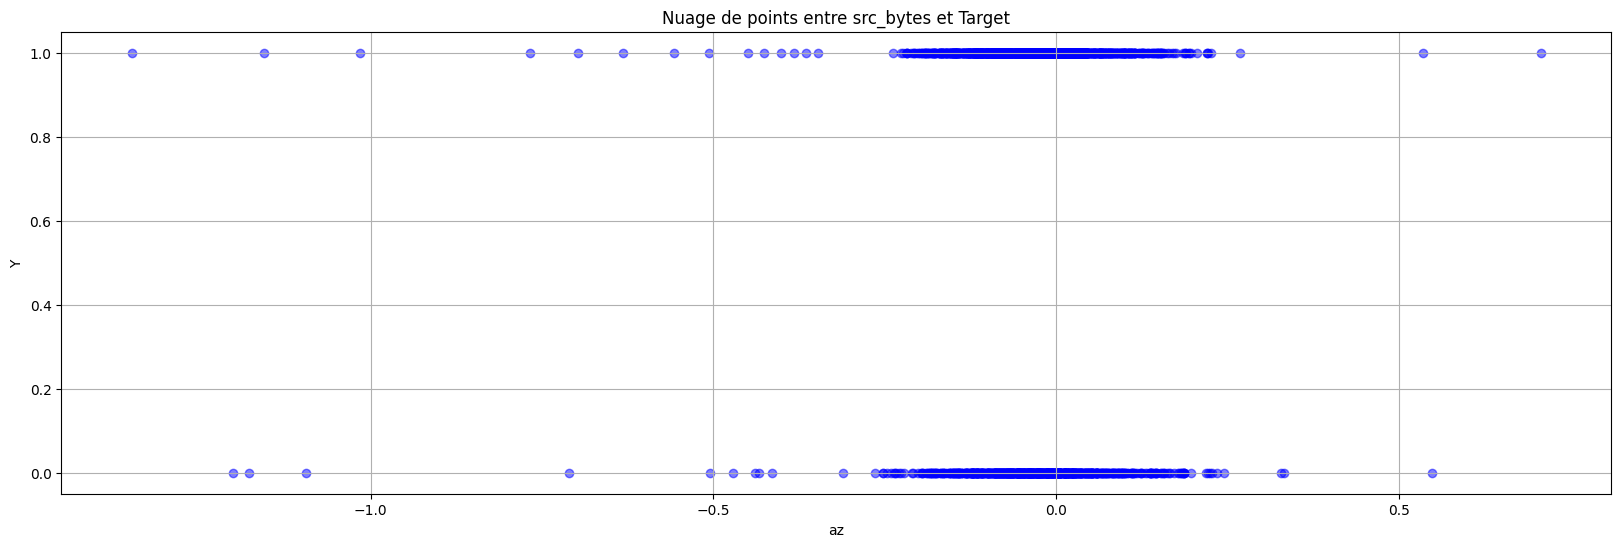

In [293]:
plt.figure(figsize=(20, 6))
plt.scatter(df["ax"], Y, alpha=0.5, marker='o', color='b')
plt.xlabel("az")
plt.ylabel("Y")
plt.title("Nuage de points entre src_bytes et Target")
plt.grid(True)
plt.show()

In [294]:
import sklearn

In [338]:
from sklearn.feature_selection import f_classif
import pandas as pd

X = df[['ax', 'ay', 'az','erreur_cumulee_m']]
 # binaire ou catégorielle

F, p = f_classif(X, Y)

for i, col in enumerate(X.columns):
    print(f"{col} → F-score : {F[i]:.2f}, p-value : {p[i]:.4f}")

ax → F-score : 1.15, p-value : 0.2836
ay → F-score : 0.99, p-value : 0.3189
az → F-score : 0.47, p-value : 0.4916
erreur_cumulee_m → F-score : 844.44, p-value : 0.0000


In [296]:
from sklearn.linear_model import LinearRegression

X= df[['ax', 'ay', 'az']]


model = LinearRegression()
model.fit(X, Y)

print(f"Score R² : {model.score(X, Y)}")

Score R² : 0.0004858563182627007


In [297]:
D = np.exp(df['ax'])
var=D.var()
print(var)

0.009102255502510512


In [298]:
coef = D.corr(Y)

In [299]:
print(coef)


-0.018536276562183675


In [300]:
X = np.exp(df[['ax', 'ay', 'az']])
X_ex=np.exp(X)
X_ex_ex=np.exp(X_ex)

In [301]:
df.describe()

,time,target_x,target_y,target_z,vx,vy,vz,ax,ay,az,...,pitch,yaw,wind_x,wind_y,wind_z,velocity,erreur_cumulee_m,rain,fog,snow
count,2.464000e+03,2464.000000,2464.0,2464.0,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,...,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,1.743455e+09,4.253247,0.0,-5.0,-0.065992,0.006957,0.121606,-0.033672,-0.015529,-10.065580,...,-0.002143,0.028595,3.003928,1.991531,0.499067,6.053584,8.455726,0.203194,0.100112,0.116391
std,9.598366e+04,3.934398,0.0,0.0,1.061842,0.592499,0.366831,0.107766,0.076340,0.497506,...,0.143031,2.430572,0.288658,0.289589,0.057503,2.236779,49.654752,0.112084,0.137869,0.166494
min,1.743261e+09,0.000000,0.0,-5.0,-5.772652,-4.895522,-0.807812,-1.348943,-0.687413,-13.078697,...,-0.617268,-3.141541,2.500296,1.500490,0.400045,2.000000,0.051157,0.000000,0.000000,0.001000
25%,1.743373e+09,0.000000,0.0,-5.0,-0.809519,-0.245806,-0.072521,-0.082440,-0.059197,-10.309862,...,-0.040424,-2.736011,2.755379,1.736404,0.450251,4.195000,1.505669,0.100000,0.033000,0.031000
50%,1.743463e+09,5.000000,0.0,-5.0,-0.012827,0.002689,0.008341,-0.029373,-0.017279,-9.924666,...,-0.000087,-0.028888,3.004239,1.991267,0.499410,6.050000,3.014879,0.210000,0.063000,0.062000
75%,1.743545e+09,5.000000,0.0,-5.0,0.777477,0.257343,0.298530,0.018487,0.026808,-9.812562,...,0.033682,2.818276,3.253556,2.241667,0.548269,7.900000,6.326627,0.300000,0.089000,0.093000
max,1.743596e+09,15.000000,0.0,-5.0,4.803883,4.148071,1.913547,0.707414,0.412539,-7.455597,...,0.659782,3.140995,3.499809,2.499839,0.599860,9.990000,1783.064562,0.400000,0.797000,0.789000


In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['time']=scaler.fit_transform(df[['time']])

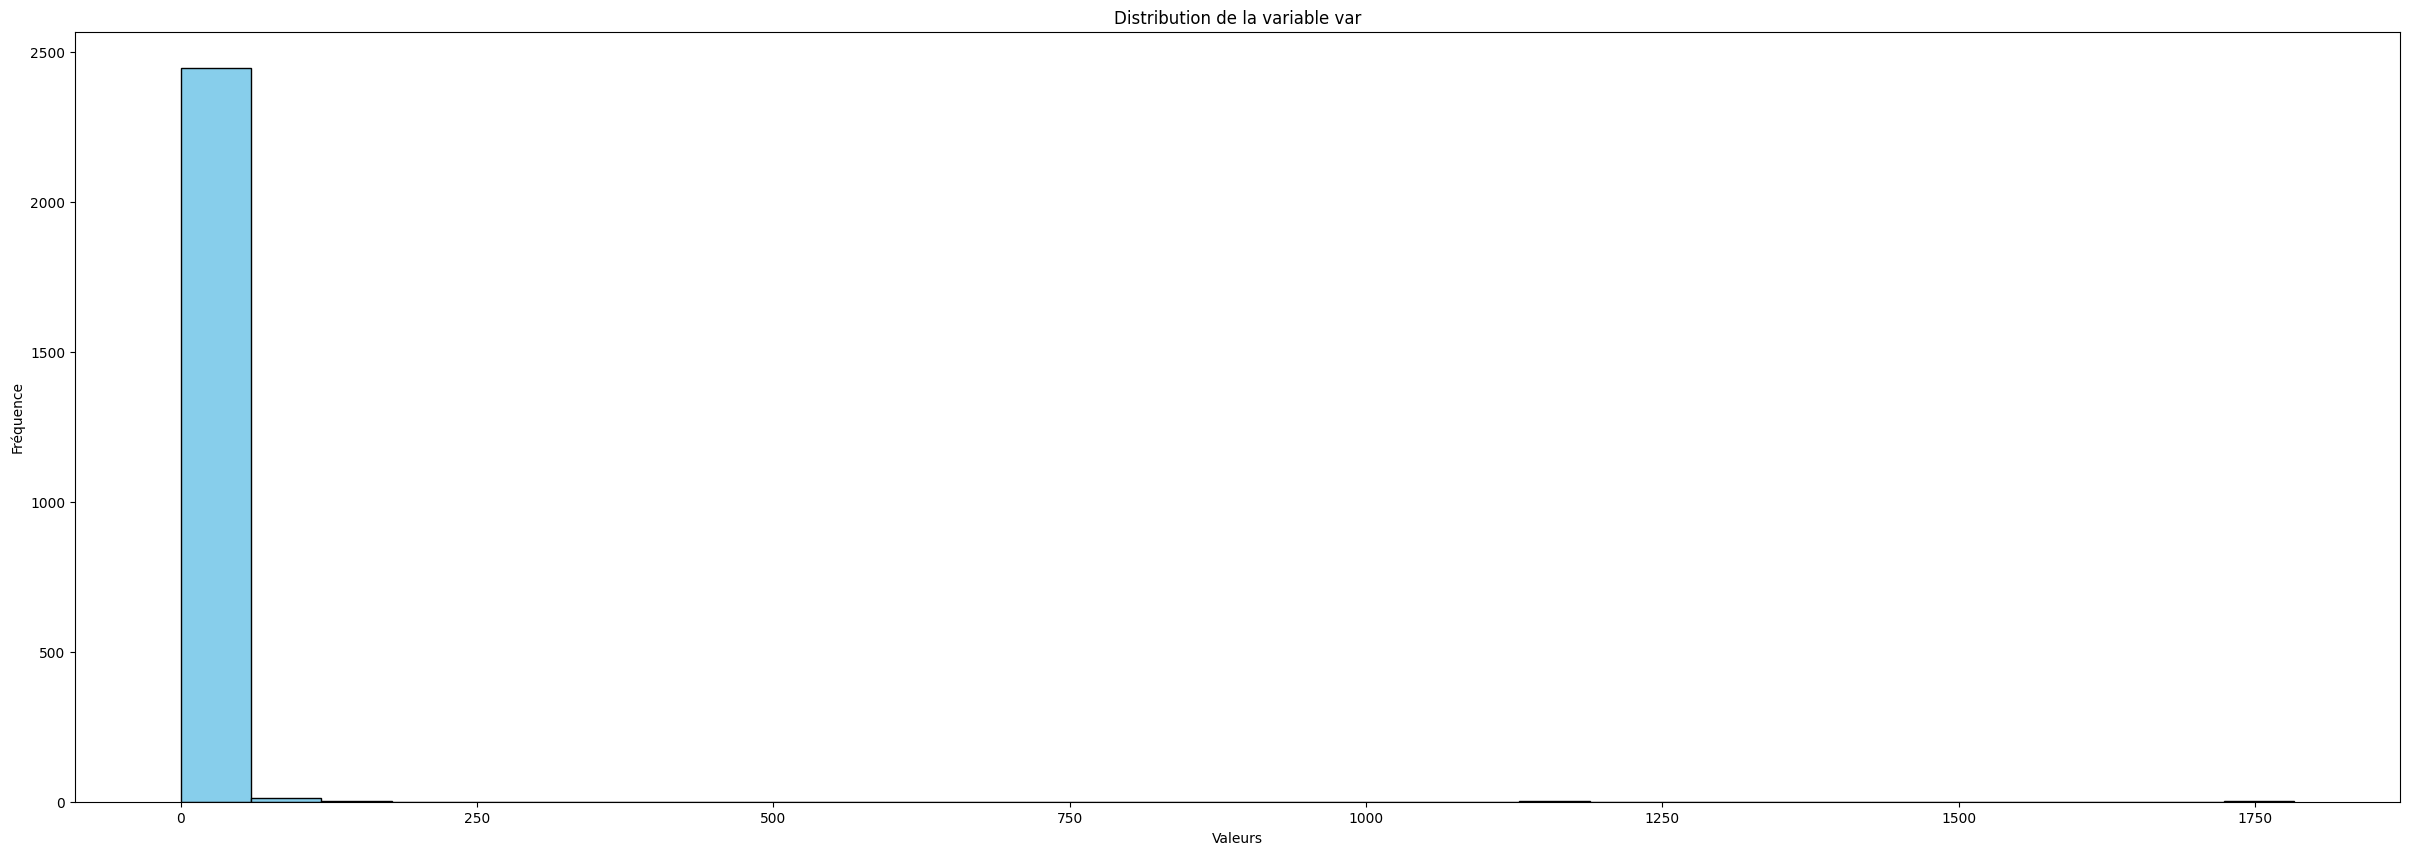

In [303]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.hist(df['erreur_cumulee_m'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution de la variable var')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

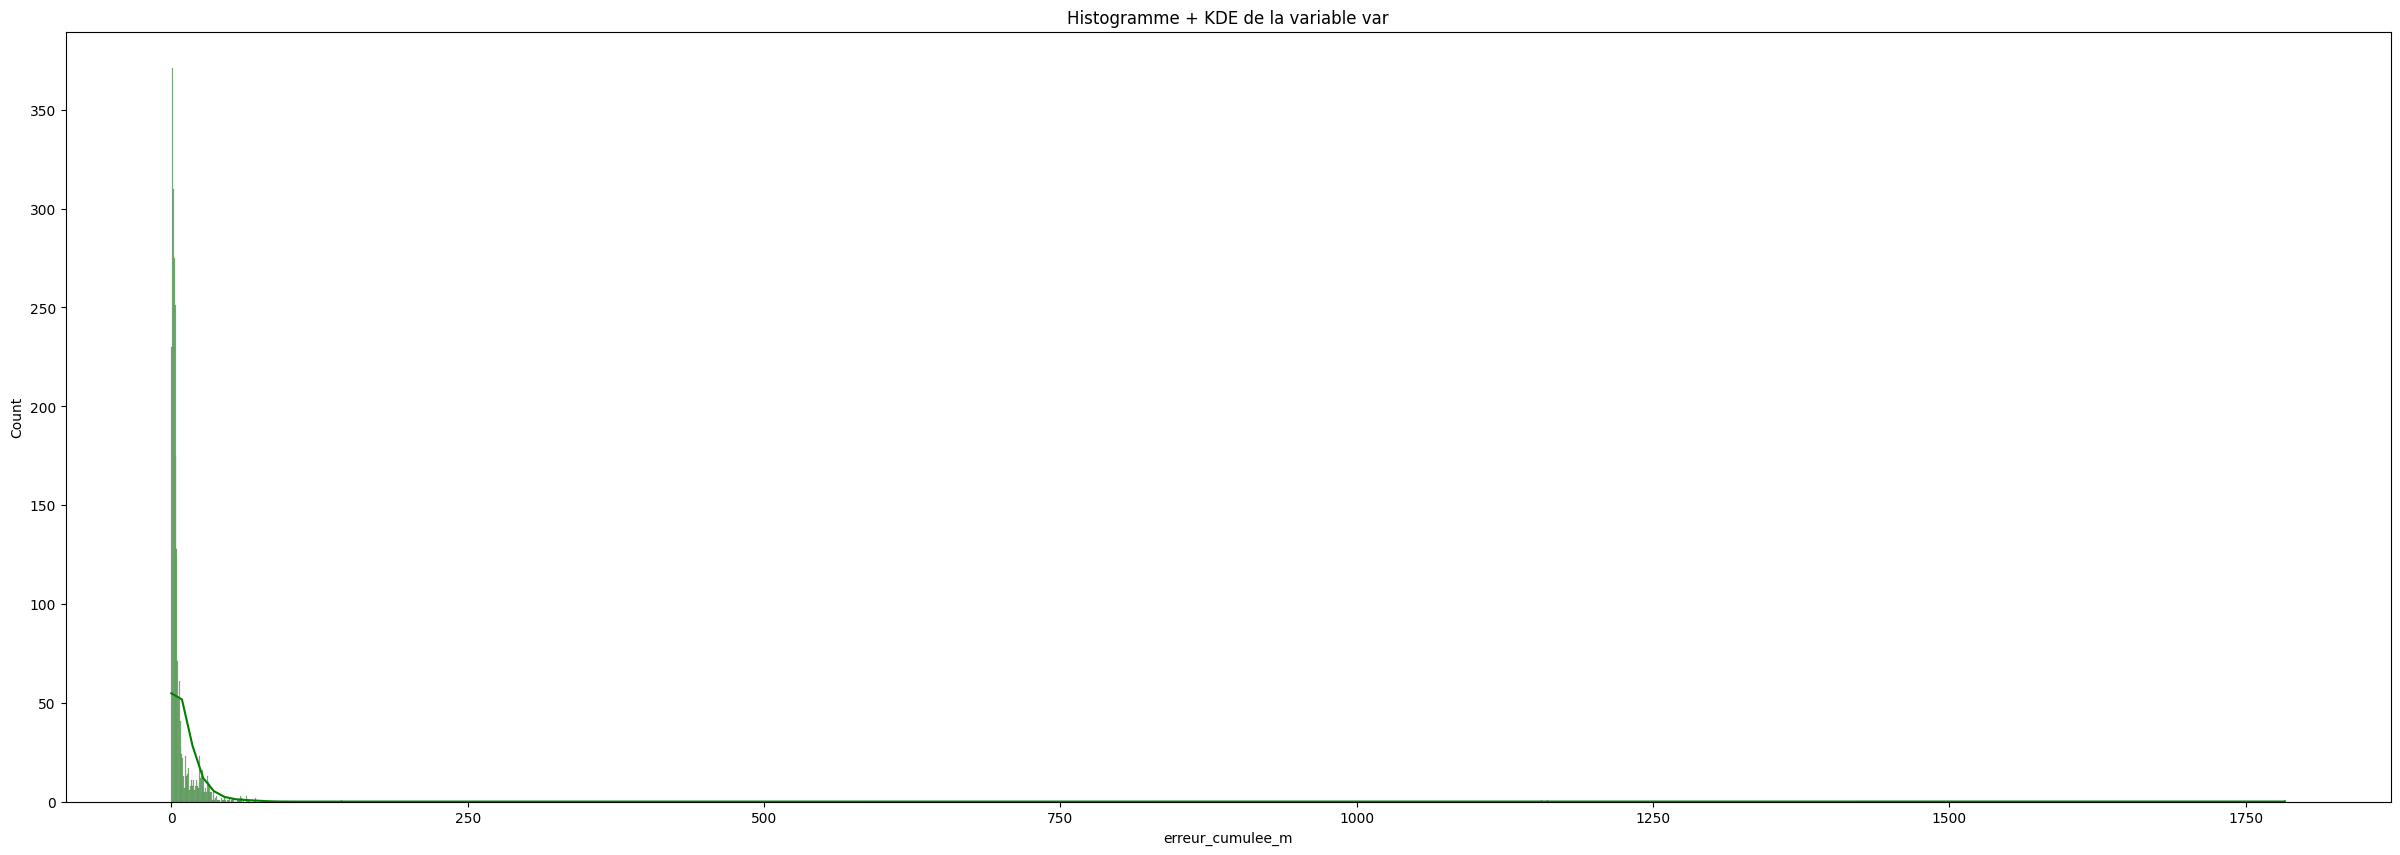

In [304]:
import seaborn as sns

plt.figure(figsize=(30,10))
sns.histplot(df['erreur_cumulee_m'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [305]:
seuil = 150
mediane = df['erreur_cumulee_m'].median()

df.loc[df['erreur_cumulee_m'] > seuil, 'erreur_cumulee_m'] = mediane

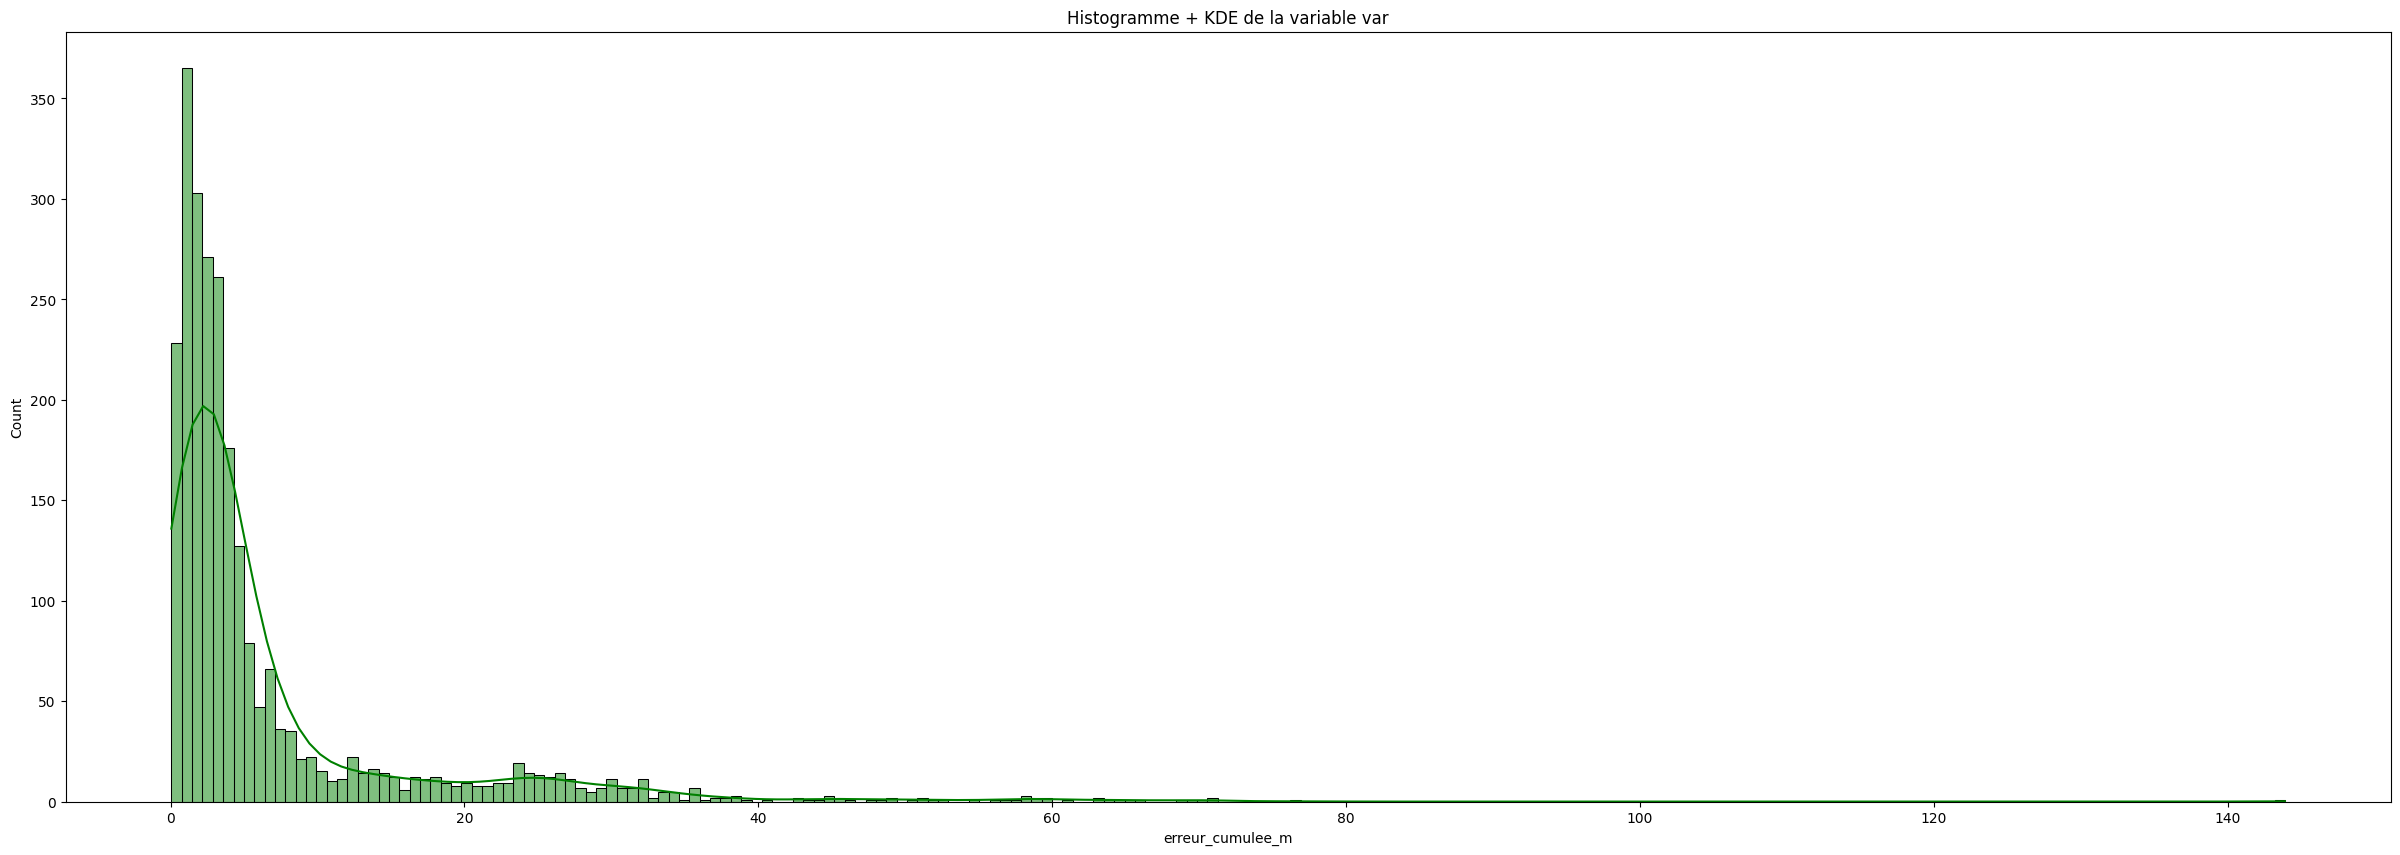

In [306]:
import seaborn as sns

plt.figure(figsize=(30,10))
sns.histplot(df['erreur_cumulee_m'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [307]:
X_drop= df.drop(columns=['ax','wind_z'])

In [308]:
X_drop=df.drop(columns=['erreur_ok'])

In [309]:
X_ex=df

In [310]:
X_ex['ax']=np.exp(df['ax'])

In [311]:
X_ex['ay']=np.exp(df['ay'])

In [312]:
X_ex['ax']=np.exp(X_ex['ax'])
X_ex['ay']=np.exp(X_ex['ay'])

In [313]:
X_ex.describe()

,time,target_x,target_y,target_z,vx,vy,vz,ax,ay,az,...,pitch,yaw,wind_x,wind_y,wind_z,velocity,erreur_cumulee_m,rain,fog,snow
count,2.464000e+03,2464.000000,2464.0,2464.0,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,...,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,1.895857e-13,4.253247,0.0,-5.0,-0.065992,0.006957,0.121606,2.655576,2.692045,-10.065580,...,-0.002143,0.028595,3.003928,1.991531,0.499067,6.053584,6.795199,0.203194,0.100112,0.116391
std,1.000203e+00,3.934398,0.0,0.0,1.061842,0.592499,0.366831,0.267961,0.207693,0.497506,...,0.143031,2.430572,0.288658,0.289589,0.057503,2.236779,10.477948,0.112084,0.137869,0.166494
min,-2.019973e+00,0.000000,0.0,-5.0,-5.772652,-4.895522,-0.807812,1.296300,1.653469,-13.078697,...,-0.617268,-3.141541,2.500296,1.500490,0.400045,2.000000,0.051157,0.000000,0.000000,0.001000
25%,-8.480037e-01,0.000000,0.0,-5.0,-0.809519,-0.245806,-0.072521,2.511467,2.566444,-10.309862,...,-0.040424,-2.736011,2.755379,1.736404,0.450251,4.195000,1.505669,0.100000,0.033000,0.031000
50%,8.778734e-02,5.000000,0.0,-5.0,-0.012827,0.002689,0.008341,2.640728,2.672112,-9.924666,...,-0.000087,-0.028888,3.004239,1.991267,0.499410,6.050000,3.014846,0.210000,0.063000,0.062000
75%,9.434126e-01,5.000000,0.0,-5.0,0.777477,0.257343,0.298530,2.769479,2.793152,-9.812562,...,0.033682,2.818276,3.253556,2.241667,0.548269,7.900000,6.286479,0.300000,0.089000,0.093000
max,1.470824e+00,15.000000,0.0,-5.0,4.803883,4.148071,1.913547,7.604488,4.529668,-7.455597,...,0.659782,3.140995,3.499809,2.499839,0.599860,9.990000,143.890897,0.400000,0.797000,0.789000


In [314]:
X_ex=X_ex.drop(columns=['erreur_ok'])

In [315]:

seuil = 3.6
mediane = X_ex['ax'].median()

X_ex.loc[X_ex['ax'] > seuil, 'ax'] = mediane

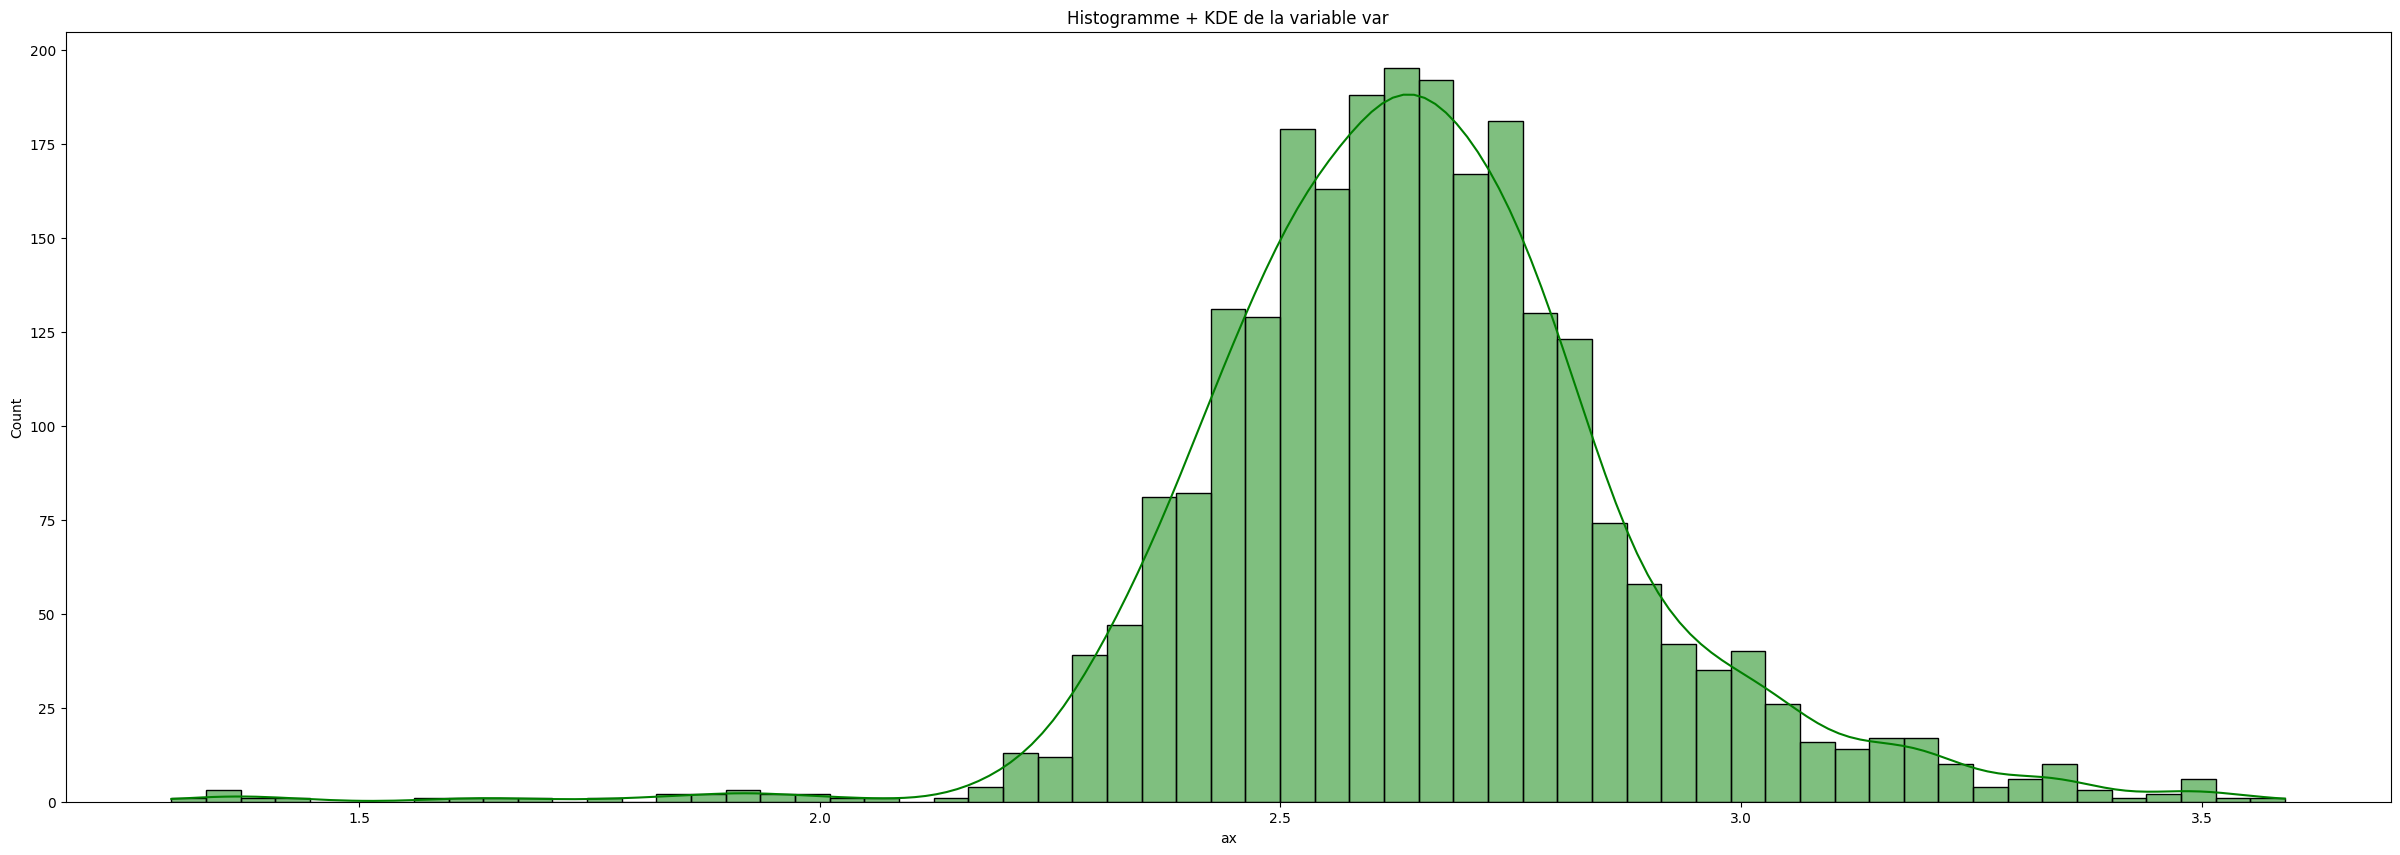

In [316]:
import seaborn as sns

plt.figure(figsize=(30,10))
sns.histplot(X_ex['ax'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [317]:
X=df.drop(columns=['erreur_ok'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ex, Y, test_size=0.2, random_state=42)

In [318]:
from sklearn.neighbors import KNeighborsClassifier

In [319]:
model=KNeighborsClassifier(n_neighbors=3)


In [320]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [321]:
model.score(X_test,y_test)

0.8803245436105477

In [322]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.79      0.81       161
        True       0.90      0.92      0.91       332

    accuracy                           0.88       493
   macro avg       0.87      0.86      0.86       493
weighted avg       0.88      0.88      0.88       493



In [323]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [324]:
from sklearn.model_selection import GridSearchCV
model2=KNeighborsClassifier()

In [325]:
grid = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [326]:
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score :", grid.best_score_)

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Meilleur score : 0.8863586712073508


In [327]:
best_knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    metric='manhattan'
)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [328]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_knn.predict(X_test)

print("Accuracy sur le jeu de test :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy sur le jeu de test : 0.9087221095334685
              precision    recall  f1-score   support

       False       0.90      0.81      0.85       161
        True       0.91      0.95      0.93       332

    accuracy                           0.91       493
   macro avg       0.91      0.88      0.89       493
weighted avg       0.91      0.91      0.91       493



In [329]:
from sklearn.model_selection import learning_curve

In [330]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_knn,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Moyenne et écart-type
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

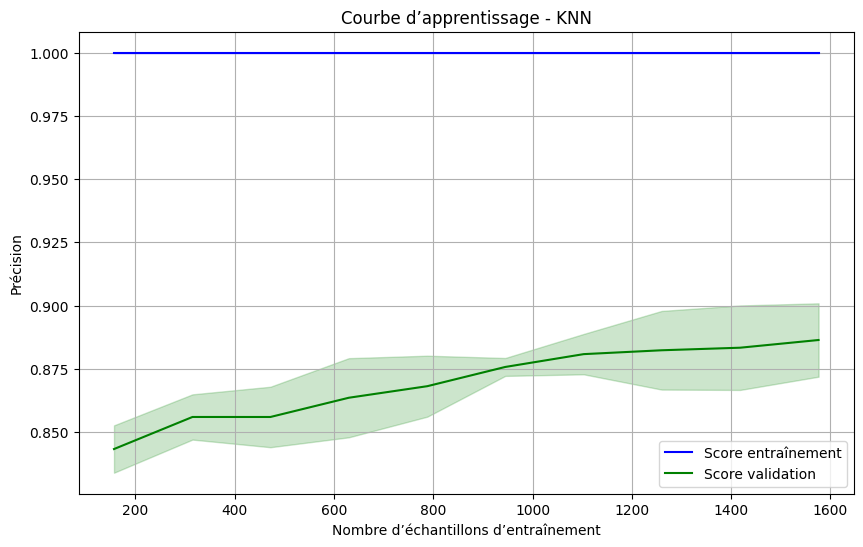

In [331]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score entraînement', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Score validation', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Courbe d’apprentissage - KNN')
plt.xlabel('Nombre d’échantillons d’entraînement')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()


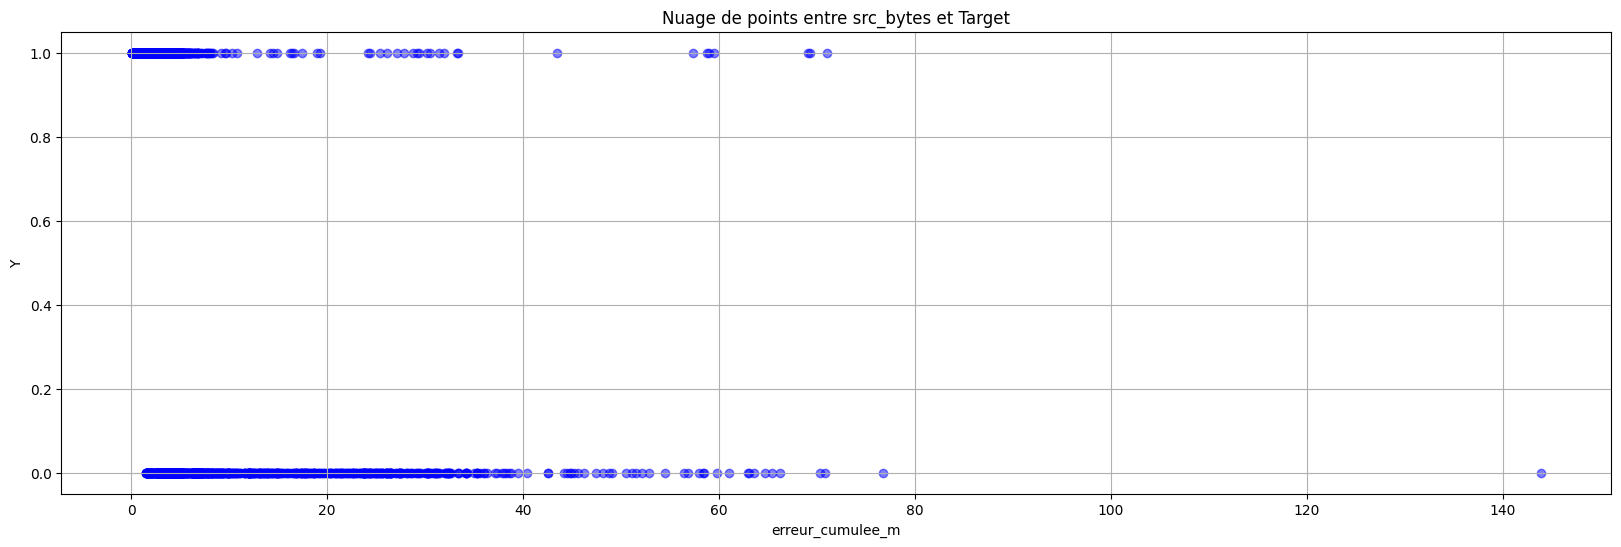

In [337]:
plt.figure(figsize=(20, 6))
plt.scatter(df["erreur_cumulee_m"], Y, alpha=0.5, marker='o', color='b')
plt.xlabel("erreur_cumulee_m")
plt.ylabel("Y")
plt.title("Nuage de points entre src_bytes et Target")
plt.grid(True)
plt.show()

In [333]:
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

                      time  target_x  target_y  target_z        vx        vy  \
time              1.000000 -0.075367       NaN       NaN -0.011906  0.008879   
target_x         -0.075367  1.000000       NaN       NaN  0.288116  0.005294   
target_y               NaN       NaN       NaN       NaN       NaN       NaN   
target_z               NaN       NaN       NaN       NaN       NaN       NaN   
vx               -0.011906  0.288116       NaN       NaN  1.000000 -0.042446   
vy                0.008879  0.005294       NaN       NaN -0.042446  1.000000   
vz               -0.079367  0.039393       NaN       NaN  0.172600  0.091738   
ax                0.003064  0.010338       NaN       NaN  0.096960 -0.019942   
ay                0.074401 -0.024940       NaN       NaN -0.038243  0.124945   
az               -0.058854 -0.060914       NaN       NaN -0.030438 -0.034847   
roll              0.018741 -0.130558       NaN       NaN -0.380685  0.031911   
pitch             0.028968 -0.011649    

In [334]:
# Seuil
seuil = 0.3

# Stocker les paires fortement corrélées
high_corr = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > seuil:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr.append((var1, var2, correlation_matrix.iloc[i, j]))

# Affichage
for v1, v2, corr in high_corr:
    print(f"Corrélation forte ({corr:.2f}) entre {v1} et {v2}")


Corrélation forte (0.35) entre az et vz
Corrélation forte (0.44) entre erreur_cumulee_m et vz
Corrélation forte (0.62) entre snow et fog


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('regressor',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [336]:
pipeline.score(X_test,y_test)

0.9046653144016227